In [1]:
# Task 9: Random Forest – Credit Card Fraud Detection

In [4]:
import numpy as np
import pandas as pd

In [2]:
#1
c=pd.read_csv('fraudTest.csv')
c.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
c.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
c.describe(include='all')

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,555719,5.557190e+05,555719,555719,555719.000000,555719,555719,555719,555719,...,555719.000000,555719.000000,5.557190e+05,555719,555719,555719,5.557190e+05,555719.000000,555719.000000,555719.000000
unique,NaN,544760,NaN,693,14,NaN,341,471,2,924,...,NaN,NaN,NaN,478,910,555719,NaN,NaN,NaN,NaN
top,NaN,2020-10-05 19:37:49,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,444 Robert Mews,...,NaN,NaN,NaN,Film/video editor,1977-03-23,1765bb45b3aa3224b4cdcb6e7a96cee3,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,1859,56370,NaN,11443,12146,304886,1474,...,NaN,NaN,NaN,4119,2408,1,NaN,NaN,NaN,NaN
mean,277859.000000,NaN,4.178387e+17,NaN,NaN,69.392810,NaN,NaN,NaN,NaN,...,38.543253,-90.231325,8.822189e+04,NaN,NaN,NaN,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,NaN,1.309837e+18,NaN,NaN,156.745941,NaN,NaN,NaN,NaN,...,5.061336,13.721780,3.003909e+05,NaN,NaN,NaN,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,NaN,6.041621e+10,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,20.027100,-165.672300,2.300000e+01,NaN,NaN,NaN,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,NaN,1.800429e+14,NaN,NaN,9.630000,NaN,NaN,NaN,NaN,...,34.668900,-96.798000,7.410000e+02,NaN,NaN,NaN,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,NaN,3.521417e+15,NaN,NaN,47.290000,NaN,NaN,NaN,NaN,...,39.371600,-87.476900,2.408000e+03,NaN,NaN,NaN,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,NaN,4.635331e+15,NaN,NaN,83.010000,NaN,NaN,NaN,NaN,...,41.894800,-80.175200,1.968500e+04,NaN,NaN,NaN,1.385867e+09,41.954163,-80.264637,0.000000


In [7]:
c.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [31]:
print(c['is_fraud'].value_counts())
print(c['is_fraud'].value_counts(normalize=True)*100)

is_fraud
0    553574
1      2145
Name: count, dtype: int64
is_fraud
0    99.614014
1     0.385986
Name: proportion, dtype: float64


In [8]:
#2
c1=c.copy()


In [9]:
c1=c1.drop(columns=['trans_num', 'cc_num', 'merchant', 'first', 'last'])
c1.head()

,Unnamed: 0,trans_date_trans_time,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,personal_care,2.86,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,personal_care,29.84,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,health_fitness,41.28,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,misc_pos,60.05,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,travel,3.19,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,1371816917,44.959148,-85.884734,0


In [10]:
c1=c1.drop(columns=['trans_date_trans_time', 'street'])
c1.head()

,Unnamed: 0,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,0,personal_care,2.86,M,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,1371816865,33.986391,-81.200714,0
1,1,personal_care,29.84,F,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,1371816873,39.450498,-109.960431,0
2,2,health_fitness,41.28,F,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,1371816893,40.495810,-74.196111,0
3,3,misc_pos,60.05,M,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,1371816915,28.812398,-80.883061,0
4,4,travel,3.19,M,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,1371816917,44.959148,-85.884734,0


In [14]:
c1=c1.drop(columns=['city', 'job','dob'])
c1.head()

,Unnamed: 0,category,amt,gender,state,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,0,personal_care,2.86,M,SC,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0
1,1,personal_care,29.84,F,UT,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0
2,2,health_fitness,41.28,F,NY,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0
3,3,misc_pos,60.05,M,FL,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0
4,4,travel,3.19,M,MI,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0


In [15]:
c1.describe(include='all')

,Unnamed: 0,category,amt,gender,state,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,555719,555719.000000,555719,555719,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
unique,NaN,14,NaN,2,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,gas_transport,NaN,F,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,56370,NaN,304886,40393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,277859.000000,NaN,69.392810,NaN,NaN,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,NaN,156.745941,NaN,NaN,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,NaN,1.000000,NaN,NaN,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,NaN,9.630000,NaN,NaN,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,NaN,47.290000,NaN,NaN,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,NaN,83.010000,NaN,NaN,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000


In [16]:
c1.dtypes

Unnamed: 0      int64
category       object
amt           float64
gender         object
state          object
zip             int64
lat           float64
long          float64
city_pop        int64
unix_time       int64
merch_lat     float64
merch_long    float64
is_fraud        int64
dtype: object

In [17]:
c1=c1.join(pd.get_dummies(c1['gender'],prefix='gender_')).drop('gender',axis=1)

In [18]:
c1=c1.join(pd.get_dummies(c1['state'],prefix='state_')).drop('state',axis=1)

In [19]:
c1=c1.join(pd.get_dummies(c1['category'],prefix='category_')).drop('category',axis=1)

In [20]:
c1.head()

,Unnamed: 0,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,...,category__grocery_pos,category__health_fitness,category__home,category__kids_pets,category__misc_net,category__misc_pos,category__personal_care,category__shopping_net,category__shopping_pos,category__travel
0,0,2.86,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0,...,False,False,False,False,False,False,True,False,False,False
1,1,29.84,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0,...,False,False,False,False,False,False,True,False,False,False
2,2,41.28,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0,...,False,True,False,False,False,False,False,False,False,False
3,3,60.05,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0,...,False,False,False,False,False,True,False,False,False,False
4,4,3.19,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0,...,False,False,False,False,False,False,False,False,False,True


In [21]:
x,y=c1.drop('is_fraud',axis=1),c1['is_fraud']

In [22]:
#3
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [35]:
#4
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Scale numeric data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train model
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train_scaled, y_train)

# Predict
y_pred_lr = lr.predict(x_test_scaled)

# Evaluation
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.00      0.00      0.00       429

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144



In [26]:
#5
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)


In [31]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [32]:
rf.score(x_test,y_test)

0.9982275246527028

In [33]:
#6
y_pred_rf = rf.predict(x_test)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.92      0.59      0.72       429

    accuracy                           1.00    111144
   macro avg       0.96      0.79      0.86    111144
weighted avg       1.00      1.00      1.00    111144



In [36]:
#7
rf.feature_importances_

array([8.54535007e-02, 3.79272863e-01, 4.00556140e-02, 3.76998054e-02,
       3.65725492e-02, 3.88289932e-02, 8.86276504e-02, 6.44259956e-02,
       6.66253676e-02, 5.47133058e-03, 5.34918607e-03, 3.14597139e-04,
       1.02830523e-03, 1.10419468e-03, 6.20629362e-04, 1.08913083e-03,
       3.64114637e-04, 5.92552046e-04, 4.65204525e-04, 1.01267468e-03,
       1.21691583e-03, 2.31923357e-04, 1.48050443e-03, 5.78237222e-04,
       1.19745800e-03, 1.29519119e-03, 1.26903910e-03, 2.00860748e-03,
       5.84680281e-04, 4.62786657e-04, 1.35917567e-03, 5.15491841e-04,
       1.19149015e-03, 1.06383357e-03, 1.36412936e-03, 1.53335566e-03,
       6.14417409e-04, 1.23984409e-03, 4.21124357e-04, 1.31176829e-03,
       5.28141066e-04, 7.74429334e-04, 1.00782905e-03, 1.23267794e-04,
       1.87855089e-03, 1.50130850e-03, 1.22530059e-03, 5.60209601e-04,
       1.72560447e-03, 1.73184894e-06, 1.07652683e-03, 5.58784979e-04,
       7.14371510e-04, 1.65216039e-03, 2.06523289e-04, 1.66067505e-03,
      

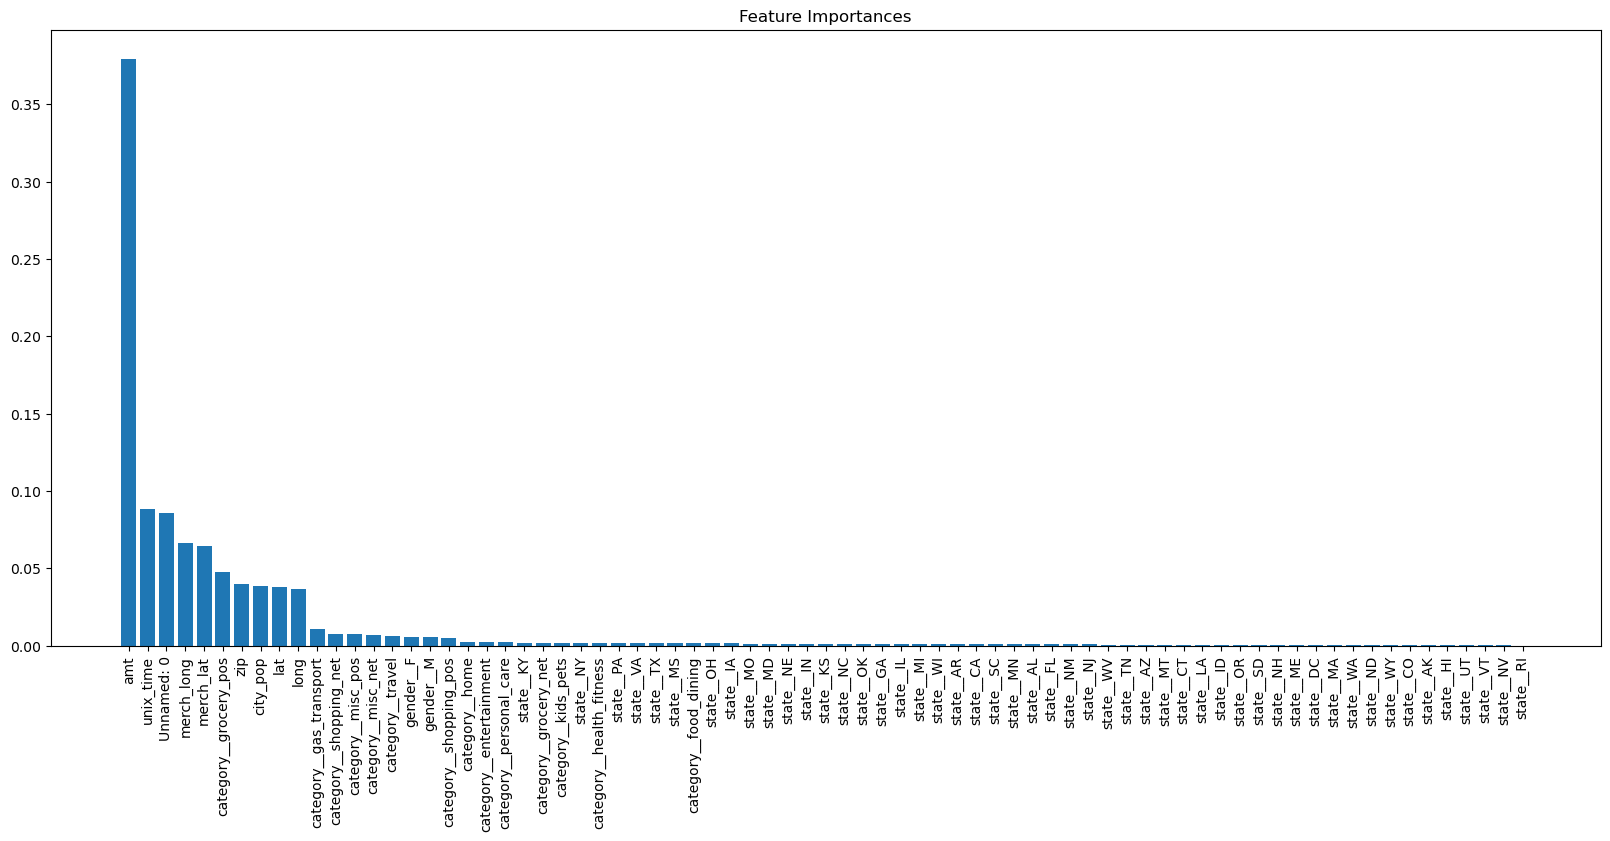

In [39]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
features = x.columns

# Sort
indices = importances.argsort()[::-1]

plt.figure(figsize=(20,8))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.show()


In [40]:
#8
from sklearn.metrics import f1_score, recall_score, precision_score

print("Logistic Regression F1:", f1_score(y_test, y_pred_lr))
print("Random Forest F1:", f1_score(y_test, y_pred_rf))

print("Logistic Regression Recall:", recall_score(y_test, y_pred_lr))
print("Random Forest Recall:", recall_score(y_test, y_pred_rf))


Logistic Regression F1: 0.0
Random Forest F1: 0.7197724039829303
Logistic Regression Recall: 0.0
Random Forest Recall: 0.5897435897435898


In [41]:
#9
import joblib

joblib.dump(rf, "fraud_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [42]:
model = joblib.load("fraud_model.pkl")
scaler = joblib.load("scaler.pkl")
